# Auto-mpg dataset

### Mileage per gallon performances of various cars

## Context:


#### The data is technical specifications of cars.

## Objective:

#### 1- Get a dataset with at least two continuos variables where one depends on other.
#### 2- Explore the linear relartionship: - Graphically using scatterplot.  - visually using correlation
#### 3- Test the significant of the correlation.
#### 4- Fit the model 
#### 5- Diagram the fitting.
#### 6- Test the model.

## Data Dictionary

### The dataset has the following information:
#### mpg:Miles per gallon.
#### cylinders:Number of cylinders in the engine.
#### displacement: Engine displacement (cu. in.).  
#### horsepower:Horsepower.
#### weight:The weight of the car in pounds.
#### acceleration:Acceleration (0-60 mph in seconds).
#### model year:Year the car was made.
#### origin:Origin of the car (USA, Europe, or Japan).
#### car name:Name of the car.

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [100]:
mpg=pd.read_csv("auto-mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [101]:
mpg.shape

(398, 9)

#### The dimension of a mpg dataset refers to the number of rows and columns in the dataset.The dimension of the mpg dataframe can be found using the .shape attribute. The .shape attribute returns a tuple of the number of rows and columns in the dataframe. The shape of mpg dataset is (398, 9), which mean 768 rows and 9 columns, so the dimension of pima is 398x9.

In [102]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### In order to know information about mpg dataset I useed mpg.info() function. This will return the numbers of entries in the dataset, the number of columns, the name of each column and their datatype.

In [103]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### In order to know the statistical measures of each column in the dataset I used .describe() function. This will return the count,mean,std,min,max, and other statistical measures for each column.

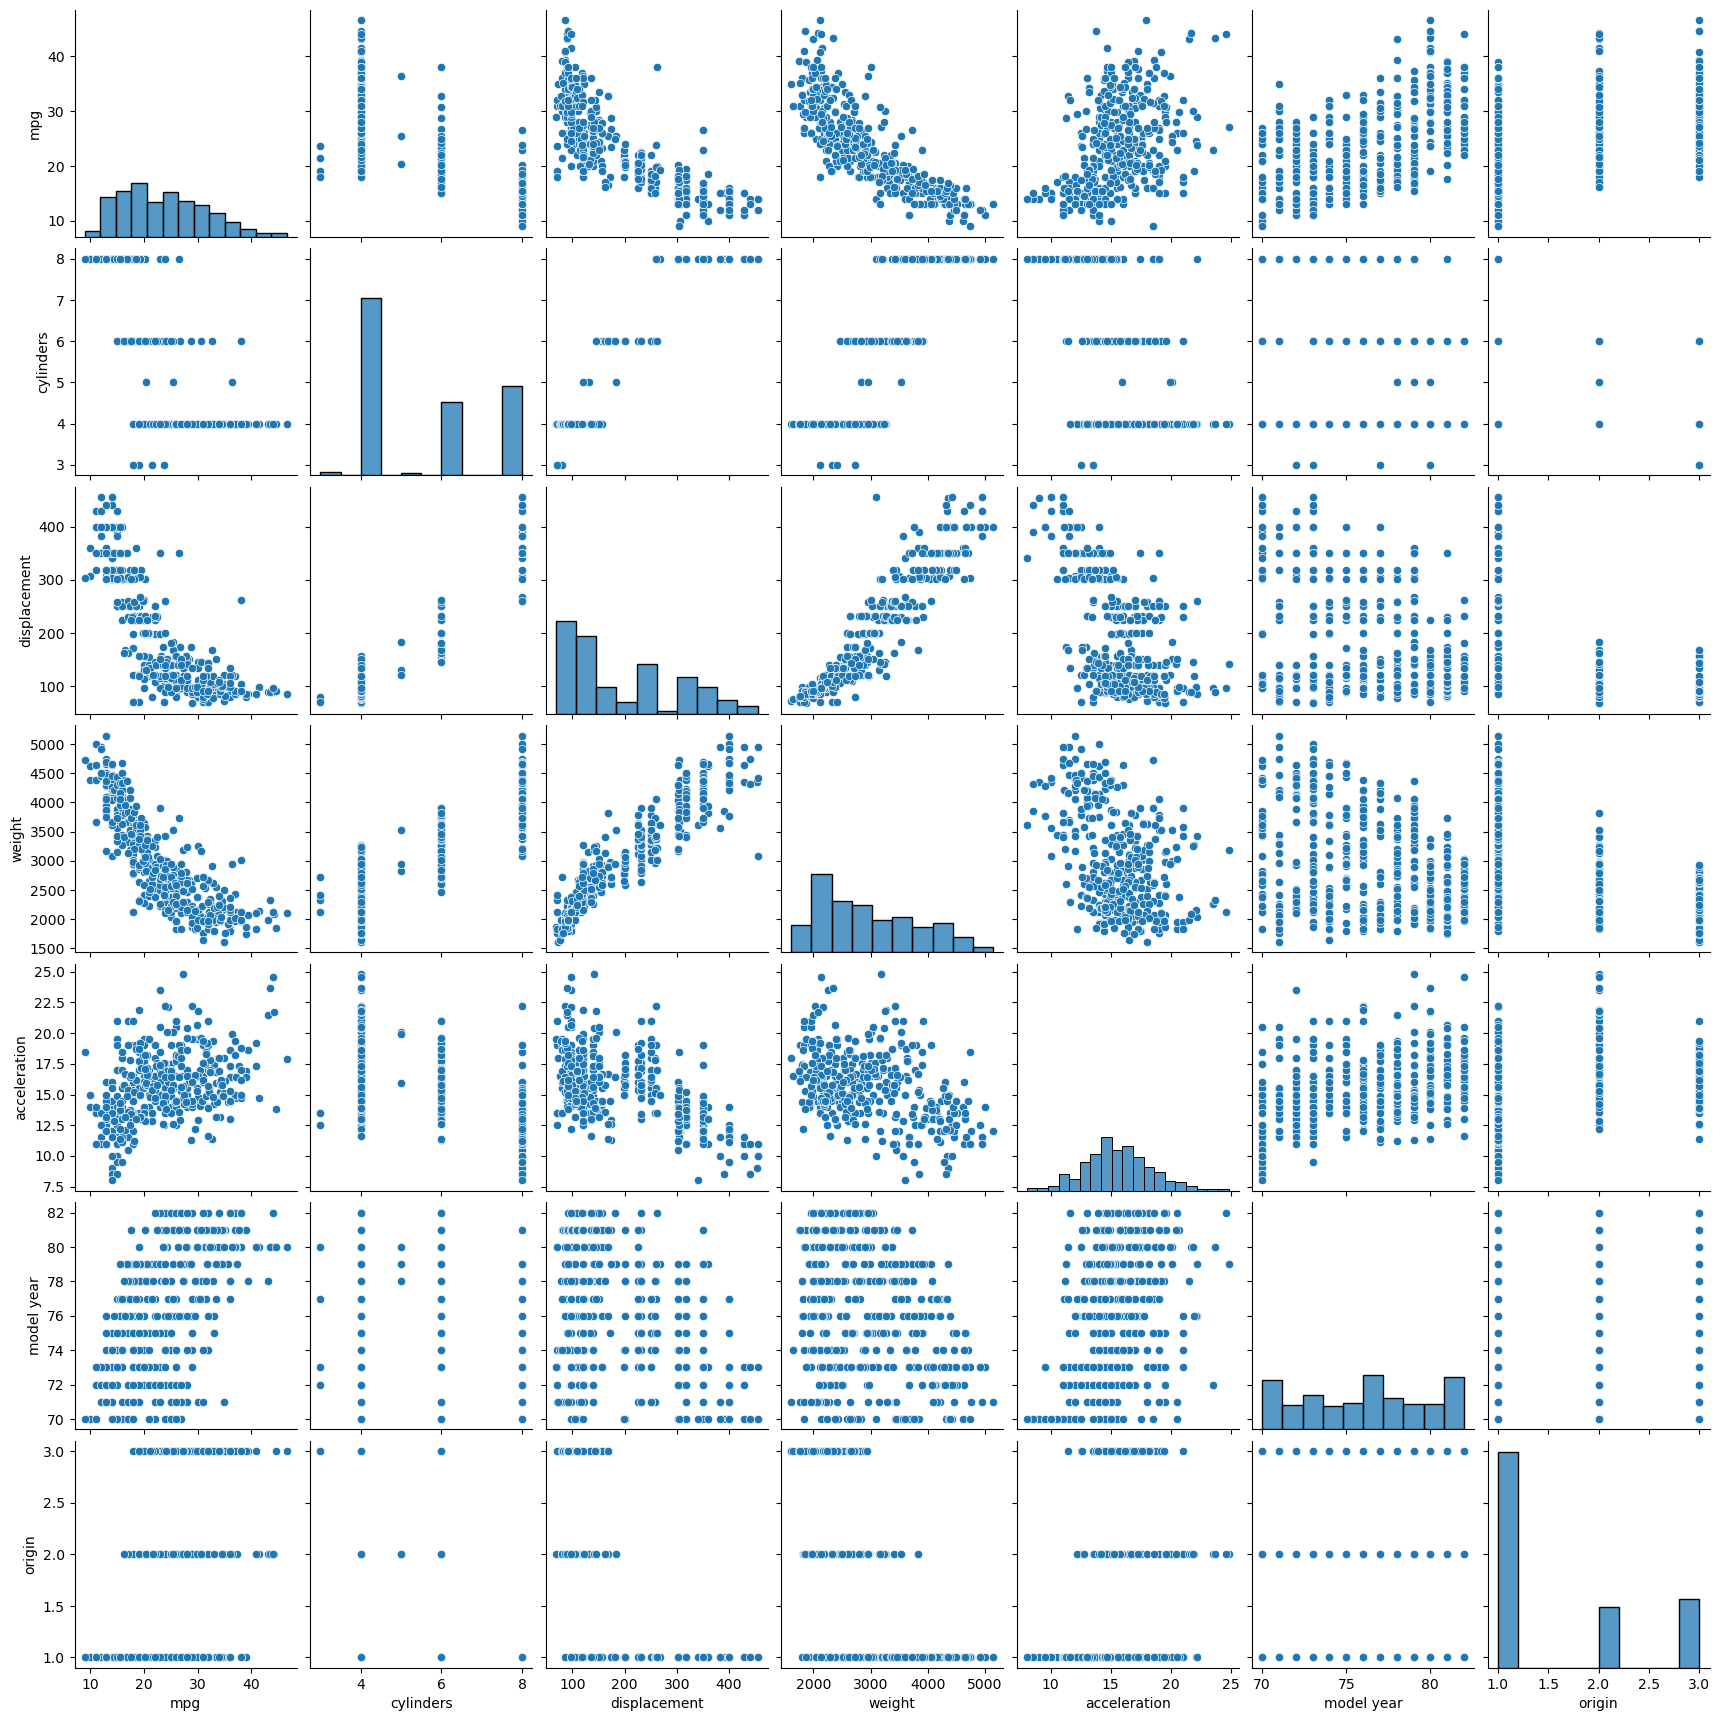

In [104]:
sns.pairplot(data=mpg)

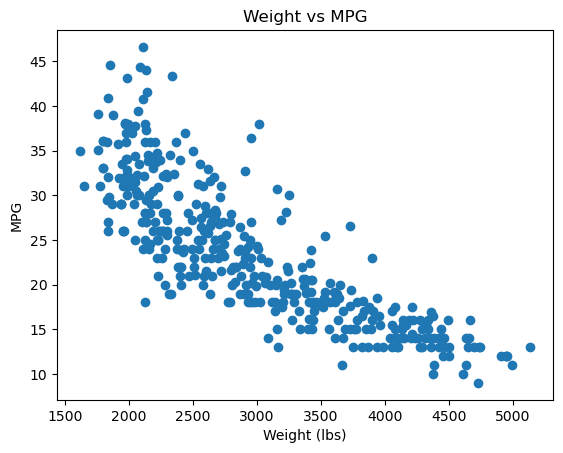

In [105]:
plt.scatter(mpg["weight"], mpg["mpg"])
plt.title("Weight vs MPG")
plt.xlabel("Weight (lbs)")
plt.ylabel("MPG")

plt.show()

### To explore the linear relationship between mpg and weight, I use a scatterplot. The scatterplot shows the relationship between the weight of a car (in pounds) and its fuel efficiency (in mpg). The points on the scatterplot represent the individual cars in the dataset. The heavier the car, the lower its mpg tends to be. This is because heavier cars require more energy to move, which reduces their fuel efficiency.
### The scatterplot also shows that there is a lot of variation in the mpg of cars of the same weight. This is because there are other factors that affect fuel efficiency, such as the engine type, the aerodynamics of the car, and the driving style of the driver.
### The summary of the observations from the scatterplot :
### •	There is a negative correlation between weight and mpg. This means that as weight increases, mpg tends to decrease.
### •	There are a few outliers in the dataset. These outliers are cars that have much lower mpg than expected for their weight.
### •	The scatterplot is not perfectly linear. This means that there are other factors that affect mpg, besides weight.


In [106]:
corr_matrix = mpg.iloc[:,0:9].corr()

corr_matrix

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


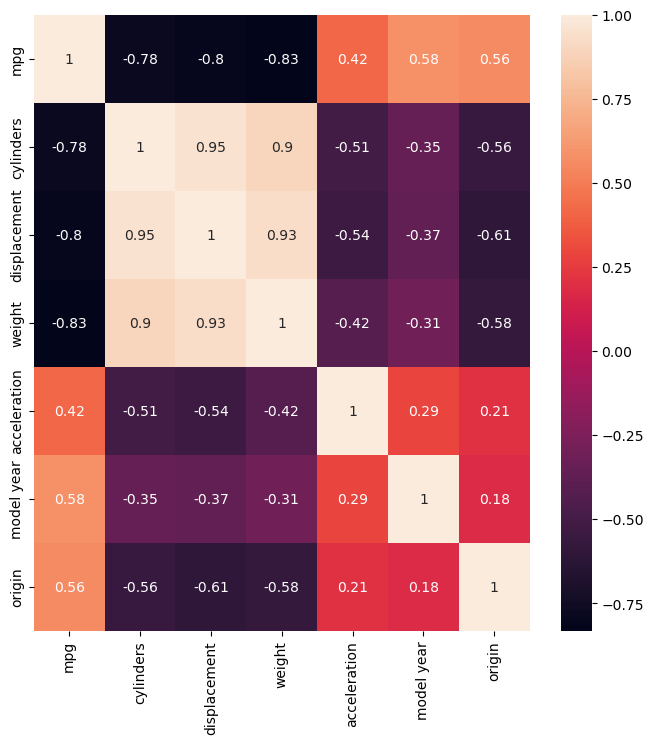

In [107]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [108]:
correlation = mpg["weight"].corr(mpg["mpg"])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.8317409332443351


#### The correlation coefficient between weight and mpg in the Auto MPG Dataset is -0.8317409332443351. This means that there is a strong negative correlation between the two variables.

#### A correlation coefficient of -0.8317409332443351 is very close to -1, which indicates a very strong negative correlation. This means that as weight increases, mpg tends to decrease very strongly.

#### The scatterplot also shows this strong negative correlation. The points on the scatterplot are very close to a line with a negative slope. This line shows the predicted mpg for a given weight.

#### The strong negative correlation between weight and mpg is due to the fact that heavier cars require more energy to move. This means that they have to work harder to achieve the same mpg as a lighter car. As a result, heavier cars tend to have lower mpg.

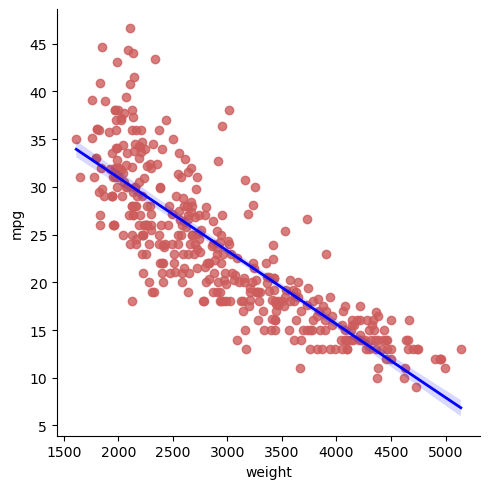

In [109]:
sns.lmplot(x="weight",y="mpg",data=mpg, scatter_kws={"marker": "o", "color": "indianred"},
line_kws={"linewidth": 2, "color": "blue"})


### The fitted line  shows this negative correlation. The line has a negative slope, which means that mpg decreases as weight increases.

### The scatterplot also shows a few outliers. These outliers are cars that have much lower mpg than expected for their weight. These outliers may be due to factors other than weight, such as the engine type or the driving style of the driver.

### Overall, the output shows that there is a strong negative correlation between weight and mpg. The fitted line is a good predictor of mpg for a given weight, but there are a few outliers that may be due to factors other than weight.

In [110]:
stats.linregress(mpg["mpg"], mpg["weight"])

LinregressResult(slope=-90.1169883937437, intercept=5089.487113013489, rvalue=-0.8317409332443352, pvalue=2.9727995640493384e-103, stderr=3.022680640799096, intercept_stderr=74.89122144624055)

#### Slope: The slope is the coefficient of the independent variable in the linear regression model. In this case, the independent variable is weight and the dependent variable is mpg. The slope of -90.1169883937437 means that for every 1 unit increase in weight, mpg decreases by 0.09 mpg.
#### Intercept: The intercept is the constant term in the linear regression model. In this case, the intercept of 5089.487113013489 means that the predicted mpg for a car with a weight of 0 pounds is 5089.487 mpg.
#### R-value: The r-value is the correlation coefficient between the independent and dependent variables. In this case, the r-value of -0.8317409332443352 is a very strong negative correlation. This means that there is a strong negative relationship between weight and mpg.
#### P-value: The p-value is the probability of obtaining the observed r-value by chance. In this case, the p-value of 2.9727995640493384e-103 is very small. This means that the correlation between weight and mpg is statistically significant.
#### Standard error: The standard error is a measure of the uncertainty in the slope estimate. In this case, the standard error of 3.022680640799096 means that the slope estimate is relatively precise.
#### Intercept standard error: The intercept standard error is a measure of the uncertainty in the intercept estimate. In this case, the intercept standard error of 74.89122144624055 means that the intercept estimate is relatively imprecise.


In [111]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mpg["mpg"], mpg["weight"])
print("y="+str(np.round(slope,2))+"x+"+str(np.round(intercept,2)))


y=-90.12x+5089.49


### The equation y = -90.12x + 5089.49 is a linear regression equation that predicts the mpg (miles per gallon) of a car based on its weight (in pounds). The equation can be interpreted as follows:
### •The predicted mpg for a car with a weight of 0 pounds is 5089.49 mpg.
### The equation is a good fit to the data, as evidenced by the r-value of -0.831, which is a very strong negative correlation. This means that there is a strong negative relationship between weight and mpg. 

## Test the model

### R-squared

In [124]:
# R-squared used 
rvalue=-0.8317409332443352
R_SQU=rvalue**2
R_SQU

0.6917929800341577

### the r-value is -0.8317409332443352. This is a very strong negative correlation, which means that there is a strong negative linear relationship between weight and mpg. The R-squared value is 0.6889419678472851. This means that 68.89% of the variance in mpg is explained by weight.

<function matplotlib.pyplot.show(close=None, block=None)>

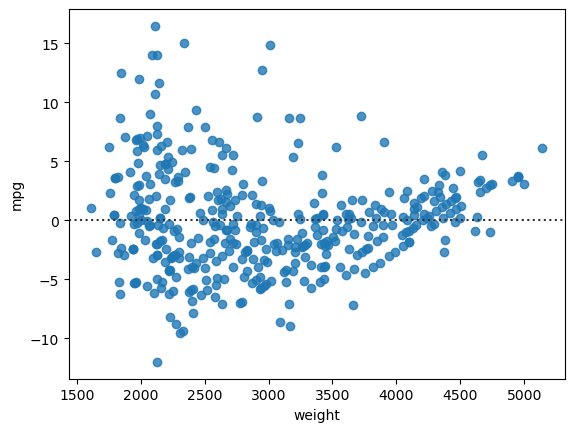

In [126]:
sns.residplot(data=mpg,x='weight',y='mpg')
plt.show


### From the above residual plot , there is a pattern in the residuals. The residuals are clustered around the lower values of weight. This suggests that the linear regression model is not a good fit to the data for cars with lower weights. There may be some other factors that are affecting the mpg of cars with lower weights.
